In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [35]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Loading

In [2]:
df = pd.read_csv('/Volumes/home/ML_DL_AI/data_sets/AmazonFineFoodReviews.csv')

In [3]:
# downsize for quick check
df = df.sample(1000)
df = df.reset_index(drop=True)
df.shape

(1000, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,263052,B006N3HYYS,ALQOBPDEIGKPJ,Kitty,2,2,4,1244592000,Excellent for bold coffee lovers!,"I love dark, strong coffee and this is one of ..."
1,167675,B006BXUZVO,ALE3ORJUOOAHV,"Noneofyourbiz ""noneofyourbiz""",0,1,4,1335398400,Love it!,"It's sweet, very sweet. And I think that's a g..."
2,328857,B0010XV4BK,A2T3I3KKTOHQNF,marys,0,0,1,1338681600,Don't Waste Your Money,I should have paid more attention to the other...
3,354498,B000G18NR0,A3N94EX7EQNWWN,M. Carr,0,0,4,1290729600,Healthy Eating,Eating healthy is very important to me. Amy's...
4,227783,B0033HPPIO,A1JS5YEH6J0PUG,Connie,2,4,1,1297036800,worst coffee ever,Was so disappointed in this coffee. I gave se...


In [5]:
# Exploratory Data Analysis (EDA)
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

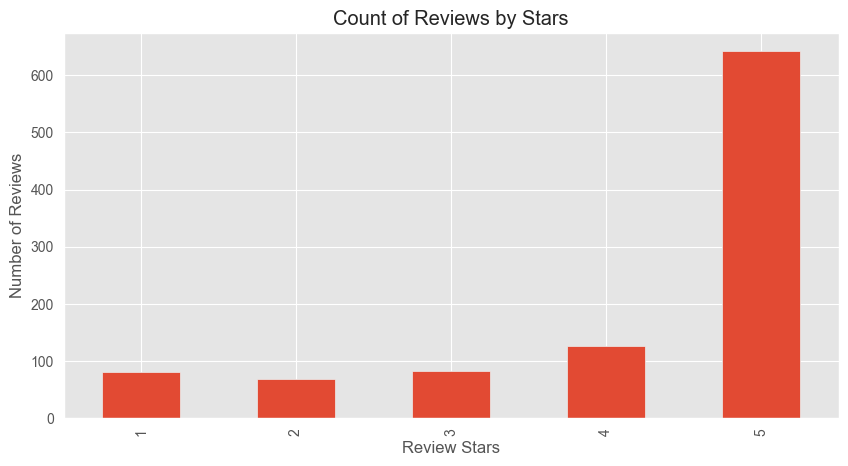

In [6]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Count of Reviews by Stars',
                                                  figsize=(10, 5))
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [7]:
example = df['Text'][50]
example

"I ordered this along with Cafix and Roastaroma to try the three. I'm a former Postum aficionado and had certainly developed quite a liking to Postum.<br /><br />Really can't take Pero Extra very much. I keep trying it again and again, prolly 10 times now, to see if I can develop a liking for it and just can't. I'm sure some people may like it, but it's just not for me.<br /><br />Cafix is what I'll usually go for, but it has a certain sort of built in sweetness (very mild, barely distinguishable)which comes from the beets that are added. Over time I've found it just sort of fills in some of the void from lack of Postum, and while it's not a Postum replica it has certain Postum like qualities.<br /><br />The Roastaroma actually is what I think tastes the best of the three, but it's taste is just not at all like Postum, is however very balanced and has a nice maltiness to it. Often I'll put just a little bit of Stevia powder in it. (I could always tell if I've ingested aspartame by (or 

In [8]:
# This only needs to be run once!
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shay/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
# exploring NLTK
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'ordered',
 'this',
 'along',
 'with',
 'Cafix',
 'and',
 'Roastaroma',
 'to',
 'try']

In [12]:
# download NLTK resource
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shay/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
# Part Of Speech
# https://en.wikipedia.org/wiki/Part-of-speech_tagging
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# https://www.guru99.com/pos-tagging-chunking-nltk.html
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('ordered', 'VBD'),
 ('this', 'DT'),
 ('along', 'IN'),
 ('with', 'IN'),
 ('Cafix', 'NNP'),
 ('and', 'CC'),
 ('Roastaroma', 'NNP'),
 ('to', 'TO'),
 ('try', 'VB')]

In [16]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/shay/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [18]:
# put tags into entities
# grouping
entities = nltk.chunk.ne_chunk(tagged)
#entities.pprint()

(S
  I/PRP
  ordered/VBD
  this/DT
  along/IN
  with/IN
  (PERSON Cafix/NNP)
  and/CC
  (GPE Roastaroma/NNP)
  to/TO
  try/VB
  the/DT
  three/CD
  ./.
  I/PRP
  'm/VBP
  a/DT
  former/JJ
  (GPE Postum/NNP)
  aficionado/NN
  and/CC
  had/VBD
  certainly/RB
  developed/VBN
  quite/RB
  a/DT
  liking/NN
  to/TO
  Postum./NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Really/NNP
  ca/MD
  n't/RB
  take/VB
  (PERSON Pero/NNP Extra/NNP)
  very/RB
  much/RB
  ./.
  I/PRP
  keep/VBP
  trying/VBG
  it/PRP
  again/RB
  and/CC
  again/RB
  ,/,
  prolly/RB
  10/CD
  times/NNS
  now/RB
  ,/,
  to/TO
  see/VB
  if/IN
  I/PRP
  can/MD
  develop/VB
  a/DT
  liking/NN
  for/IN
  it/PRP
  and/CC
  just/RB
  ca/MD
  n't/RB
  ./.
  I/PRP
  'm/VBP
  sure/JJ
  some/DT
  people/NNS
  may/MD
  like/VB
  it/PRP
  ,/,
  but/CC
  it/PRP
  's/VBZ
  just/RB
  not/RB
  for/IN
  me./NN
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Cafix/NNP
  is/VBZ
  what/WP
  I/PRP
  'll

# VADER
(Valence Aware Dictionary and sEntiment Reasoner)  
Use NLTK's SentimentIntensityAnalyzer to get negative/neutral/positive scores of the text.
This uses a bag of words approach
- remove stop words
- each remaining word is scored and combined to a total score


In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shay/nltk_data...


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm     # progress bar tracker

sia = SentimentIntensityAnalyzer()

In [22]:
# example
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [23]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [24]:
sia.polarity_scores(example)

{'neg': 0.037, 'neu': 0.81, 'pos': 0.153, 'compound': 0.9849}

In [26]:
# Run the polarity score on the sample dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [27]:
# want result in a DataFrame
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [28]:
# nw we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,263052,0.000,0.694,0.306,0.9051,B006N3HYYS,ALQOBPDEIGKPJ,Kitty,2,2,4,1244592000,Excellent for bold coffee lovers!,"I love dark, strong coffee and this is one of ..."
1,167675,0.000,0.633,0.367,0.9168,B006BXUZVO,ALE3ORJUOOAHV,"Noneofyourbiz ""noneofyourbiz""",0,1,4,1335398400,Love it!,"It's sweet, very sweet. And I think that's a g..."
2,328857,0.058,0.806,0.136,0.8100,B0010XV4BK,A2T3I3KKTOHQNF,marys,0,0,1,1338681600,Don't Waste Your Money,I should have paid more attention to the other...
3,354498,0.000,0.712,0.288,0.9391,B000G18NR0,A3N94EX7EQNWWN,M. Carr,0,0,4,1290729600,Healthy Eating,Eating healthy is very important to me. Amy's...
4,227783,0.124,0.763,0.113,-0.1496,B0033HPPIO,A1JS5YEH6J0PUG,Connie,2,4,1,1297036800,worst coffee ever,Was so disappointed in this coffee. I gave se...


# Plot VADER result

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [43]:
plt.style.use('ggplot')

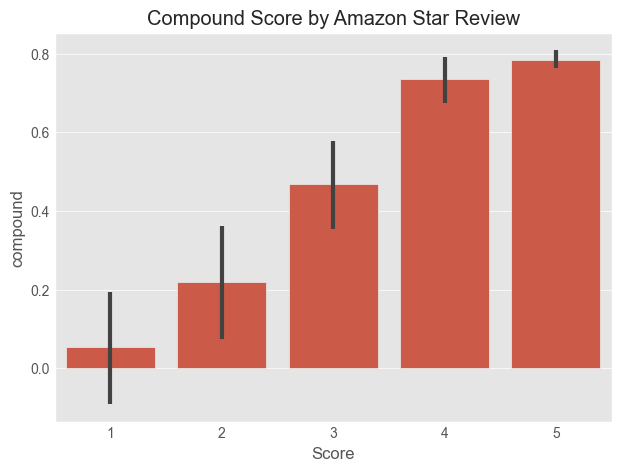

In [44]:
# Is this what we expect?
# if score by reviewer was 5 it is more likley be positive review than if score was 1

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

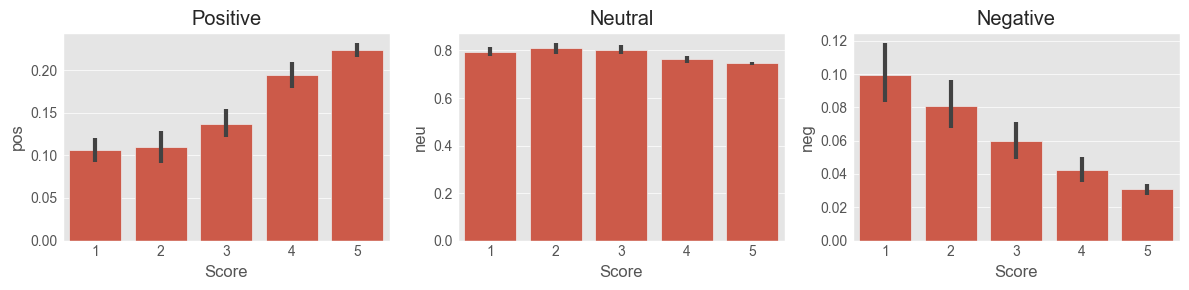

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model